<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Ресемплинг" data-toc-modified-id="Ресемплинг-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ресемплинг</a></span></li><li><span><a href="#Корректировка-выбросов" data-toc-modified-id="Корректировка-выбросов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Корректировка выбросов</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Заполнение-пустых-значений" data-toc-modified-id="Заполнение-пустых-значений-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Заполнение пустых значений</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-трендов-и-сезонности" data-toc-modified-id="Анализ-трендов-и-сезонности-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ трендов и сезонности</a></span></li><li><span><a href="#Анализ-корреляции" data-toc-modified-id="Анализ-корреляции-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ корреляции</a></span></li><li><span><a href="#Удаление--ненужных-столбцов" data-toc-modified-id="Удаление--ненужных-столбцов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление  ненужных столбцов</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#OHE" data-toc-modified-id="OHE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>OHE</a></span></li><li><span><a href="#Подготовка-к-кросс-валидации" data-toc-modified-id="Подготовка-к-кросс-валидации-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подготовка к кросс-валидации</a></span></li><li><span><a href="#Линейная-модель" data-toc-modified-id="Линейная-модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Линейная модель</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Загрузка библиотек

In [79]:
!pip install scikit-learn==1.1.3

In [80]:
!pip install phik

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor 
from catboost import CatBoostRegressor

### Загрузка данных

In [82]:
taxi = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
taxi = taxi.sort_index()

### Обзор данных

In [83]:
display(taxi.head())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [84]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [85]:
taxi.describe(include='all')

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


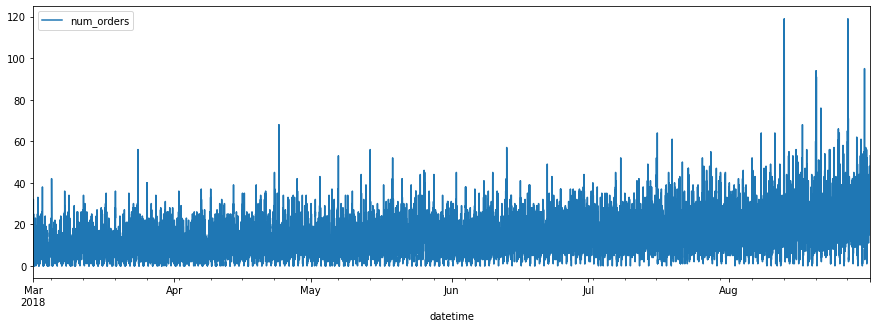

In [86]:
#Проверка на выбросы
taxi.plot(figsize=(15, 5));

In [87]:
#Проверка на дубликаты
taxi_copy = taxi.reset_index()
display(taxi_copy.loc[taxi_copy['datetime'].duplicated(keep=False), 'datetime'].count())

0

In [88]:
print(taxi.index.min())
print(taxi.index.max())

2018-03-01 00:00:00
2018-08-31 23:50:00


**Вывод:**
Загружен датасет с количеством строк, равным 26 496. В датасете содержатся данные о количестве заказов в разрезе каждых 10 минут в период с 01.03.2018 по 31.08.2018 (полгода). Датасет не содержит пропусков и дубликатов, но содержит выбросы. План действий:
* Провести ресемплинг, и объединить данные по каждому часу
* Скорректировать выбросы
* Создать новые столбцы
* Провести анализ, и по его результатам добавить новые столбцы, удалить ненужные

### Ресемплинг

In [89]:
taxi = taxi.resample('1H').sum()

<AxesSubplot:xlabel='datetime'>

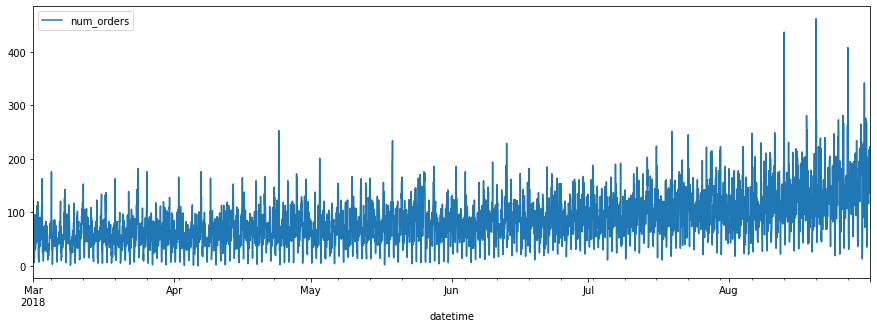

In [90]:
taxi.plot(figsize=(15, 5))

### Корректировка выбросов

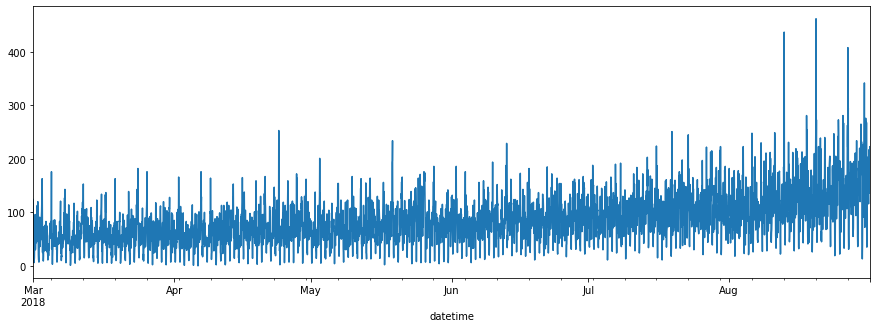

In [91]:
#Заменим средним значением выбросы выше 99,5% квантиля. Определять квантиль будем понедельно
taxi['week'] = pd.Int64Index(taxi.index.isocalendar().week) #taxi.index.week
shape_before = taxi.shape[0]

for i in range(taxi['week'].min(), taxi['week'].max()+1):
    quantile = taxi.loc[taxi['week']==i, 'num_orders'].quantile(0.995)
    mean = taxi.loc[((taxi['week']==i) & (taxi['num_orders']>quantile)), 'num_orders'].mean()
    taxi.loc[((taxi['week']==i) & (taxi['num_orders']>quantile))] = mean

taxi['num_orders'].plot(figsize=(15, 5));

### Добавление новых столбцов

In [93]:
def new_features(df):
    new_df = df.copy()
    #Новые столбцы - месяц, неделя, номер недели, день, день недели, час, лаг в 1 час, сглаженное среднее
    new_df['month'] = new_df.index.month
    new_df['day'] = new_df.index.day
    new_df['dayofweek'] = new_df.index.dayofweek
    new_df['hour'] = new_df.index.hour
    new_df['lag'] = new_df['num_orders'].shift(1)
    for i in range(24, 169, 24): #Средний спрос за последние 24 часа, 48 часов, 72 часа и т.д. - до 1 недели
        new_df['rolling_mean_{}'.format(i)] = new_df['num_orders'].shift().rolling(i).mean()
    return new_df

In [94]:
taxi = new_features(taxi)

In [95]:
display(taxi.head())

,num_orders,week,month,day,dayofweek,hour,lag,rolling_mean_24,rolling_mean_48,rolling_mean_72,rolling_mean_96,rolling_mean_120,rolling_mean_144,rolling_mean_168
datetime,,,,,,,,,,,,,,
2018-03-01 00:00:00,124.0,9.0,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85.0,9.0,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71.0,9.0,3,1,3,2,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66.0,9.0,3,1,3,3,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43.0,9.0,3,1,3,4,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Заполнение пустых значений

Для столбцов rolling_mean заполним пустые значения средним значением всех предыдущих строк, после чего удалим первую строку, так как заполнить в ней пустые данные невозможно

In [96]:
#Заполнение пустых значений
columns = ['rolling_mean_24', 'rolling_mean_48', 'rolling_mean_72', 'rolling_mean_96', 
           'rolling_mean_120','rolling_mean_144','rolling_mean_168']

for column in columns:
    max_null_index = taxi[taxi[column].isna()].index.max()
    null_indexes = taxi[taxi.index <= max_null_index].index
    null_indexes = null_indexes[1:] #В первой строке не будем заменять значение
    for i in null_indexes:
        mean_before = taxi.loc[taxi.index < i, 'num_orders'].mean()
        taxi.loc[i, column] = mean_before
        
display(taxi.head())

#Удаление первой строки
taxi = taxi.drop(taxi.index.min())
display(taxi.head(25))

,num_orders,week,month,day,dayofweek,hour,lag,rolling_mean_24,rolling_mean_48,rolling_mean_72,rolling_mean_96,rolling_mean_120,rolling_mean_144,rolling_mean_168
datetime,,,,,,,,,,,,,,
2018-03-01 00:00:00,124.0,9.0,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85.0,9.0,3,1,3,1,124.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
2018-03-01 02:00:00,71.0,9.0,3,1,3,2,85.0,104.500000,104.500000,104.500000,104.500000,104.500000,104.500000,104.500000
2018-03-01 03:00:00,66.0,9.0,3,1,3,3,71.0,93.333333,93.333333,93.333333,93.333333,93.333333,93.333333,93.333333
2018-03-01 04:00:00,43.0,9.0,3,1,3,4,66.0,86.500000,86.500000,86.500000,86.500000,86.500000,86.500000,86.500000


,num_orders,week,month,day,dayofweek,hour,lag,rolling_mean_24,rolling_mean_48,rolling_mean_72,rolling_mean_96,rolling_mean_120,rolling_mean_144,rolling_mean_168
datetime,,,,,,,,,,,,,,
2018-03-01 01:00:00,85.0,9.0,3,1,3,1,124.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
2018-03-01 02:00:00,71.0,9.0,3,1,3,2,85.0,104.500000,104.500000,104.500000,104.500000,104.500000,104.500000,104.500000
2018-03-01 03:00:00,66.0,9.0,3,1,3,3,71.0,93.333333,93.333333,93.333333,93.333333,93.333333,93.333333,93.333333
2018-03-01 04:00:00,43.0,9.0,3,1,3,4,66.0,86.500000,86.500000,86.500000,86.500000,86.500000,86.500000,86.500000
2018-03-01 05:00:00,6.0,9.0,3,1,3,5,43.0,77.800000,77.800000,77.800000,77.800000,77.800000,77.800000,77.800000
2018-03-01 06:00:00,12.0,9.0,3,1,3,6,6.0,65.833333,65.833333,65.833333,65.833333,65.833333,65.833333,65.833333
2018-03-01 07:00:00,15.0,9.0,3,1,3,7,12.0,58.142857,58.142857,58.142857,58.142857,58.142857,58.142857,58.142857
2018-03-01 08:00:00,34.0,9.0,3,1,3,8,15.0,52.750000,52.750000,52.750000,52.750000,52.750000,52.750000,52.750000
2018-03-01 09:00:00,69.0,9.0,3,1,3,9,34.0,50.666667,50.666667,50.666667,50.666667,50.666667,50.666667,50.666667


## Анализ

### Анализ трендов и сезонности

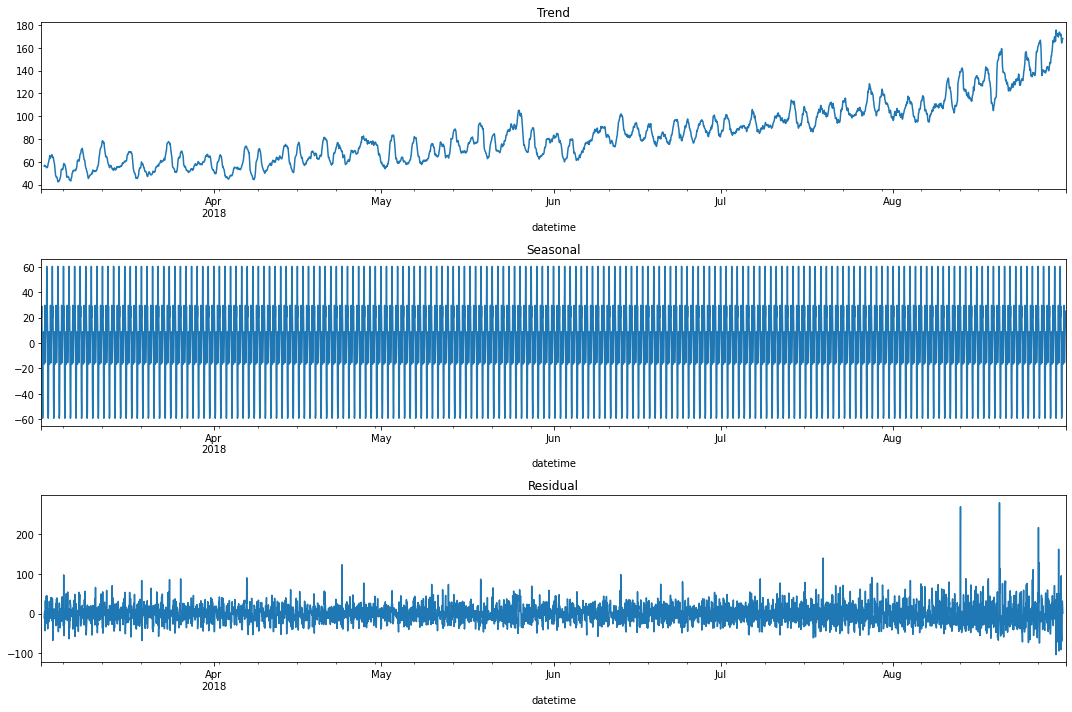

In [97]:
decomposed = seasonal_decompose(taxi['num_orders'])
plt.figure(figsize = (15, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')
plt.tight_layout()

In [98]:
#Добавим новые столбцы в выгрузку
taxi['trend'] = decomposed.trend
taxi['seasonal'] = decomposed.seasonal

**Вывод:**
По графику Trend видно, что количество заказов такси увеличивается. Но нам доступен для анализа только период с марта по сентябрь 2018 года (полгода), поэтому нельзя быть на 100% уверенными в том, что перевозки и в дальнейшем будут расти. Зато хорошо видна "сезонность" в течение дня - нужно исследовать ее отдельно.

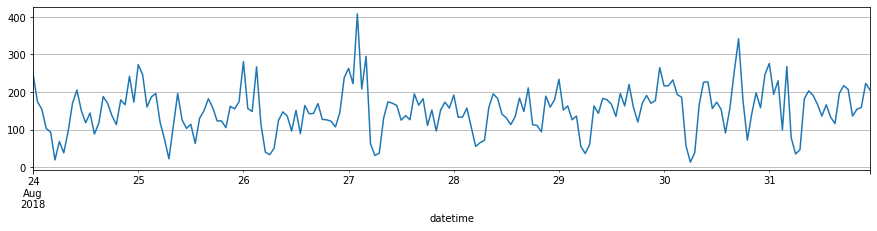

In [99]:
#Анализ колебаний в течение дня
taxi1 = taxi['2018-08-24':'2018-08-31']
taxi1['num_orders'].plot(figsize=(15, 3), grid=True);

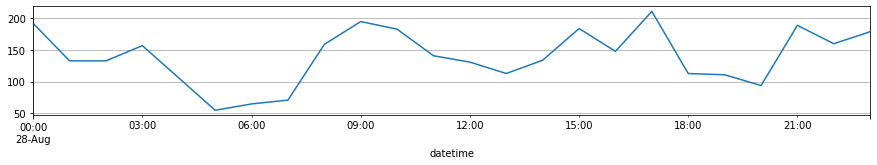

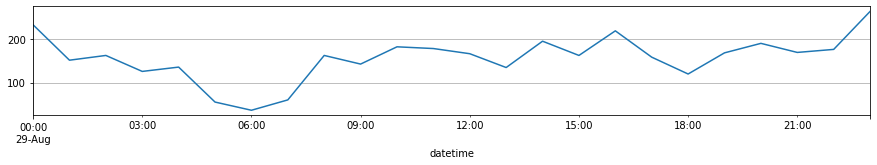

In [100]:
#Анализ колебаний в течение дня на примере 28.08.2018 и 29.08.2018
taxi2 = taxi.loc['2018-08-28']
taxi2['num_orders'].plot(figsize=(15, 2), grid=True)
plt.show();
taxi3 = taxi.loc['2018-08-29']
taxi3['num_orders'].plot(figsize=(15, 2), grid=True);

**Вывод:**

Из графика видны примерно следующие колебания в течение дня:
* Примерно с 3:00 до 7:00 спрос низкий - большинство клиентов спит;
* С 08:00 до 10:00 спрос повышается - скорее всего клиенты едут на работу;
* С 11:00 до 13:00 спрос ненамного падает - обед; 
* С 14:00 до 17:00 спрос немного повышается - возможно, связано с деловыми поездками;
* С 18:00-21:00 немного падает - скорее всего клиенты выбирают общественный транспорт для того, чтобы добраться домой, что в том числе связано с пробками;
* С 22:00 до 03:00 наблюдается пиковый спрос - час пик уже прошел, добраться на такси уже удобнее. К тому же часть временного диапазона приходится на время, когда общественный транспорт не работает.

Таким образом видно, что показатель часа является значимым для дальнейшего построения модели

(max-min)/max: 0.18632215242384734


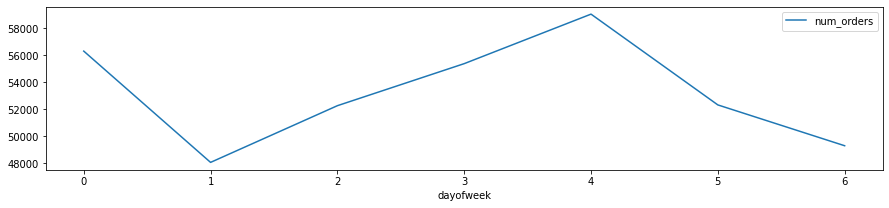

In [101]:
#Анализ суммарного спроса в разрезе дней недели за весь период
taxi4 = pd.DataFrame(taxi.groupby('dayofweek')['num_orders'].agg('sum'), columns=['num_orders'])
taxi4.plot(figsize=(15, 3))
print('(max-min)/max:', (taxi4['num_orders'].max() - taxi4['num_orders'].min())/taxi4['num_orders'].max())

<AxesSubplot:xlabel='datetime'>

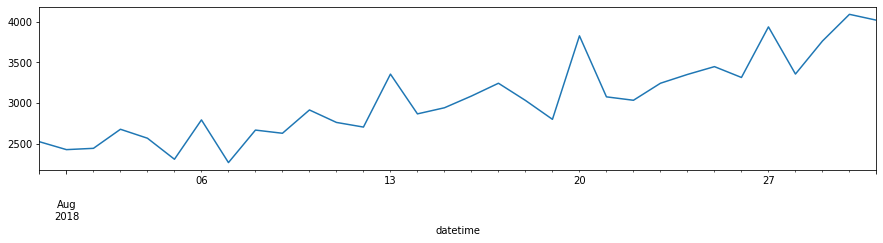

In [102]:
#Анализ динамики спроса за период с 31.07.2018 по 31.08.2018
taxi5 = taxi['num_orders'].resample('1D').sum()
taxi5 = taxi5.loc['2018-07-31':'2018-08-31']
taxi5.plot(figsize=(15, 3))

**Вывод:**

Из первого графика видны колебания спроса в течение дней недели. 0-пн, 6-вс. При этом разница в общем количестве заказов между днем с наименьшим спросом (вторник) и днем с наибольших спросом (пятница) составляет примерно 19%.
* Наименьший спрос наблюдается во вторник и воскресенье;
* Наибольший спрос наблюдается в понедельник и пятницу.

Из второго графика на отрезке 31.07.2018-31.08.2018 видно, что пиковые значения приходятся на 6, 13, 20, 27 августа - это понедельник.

Таким образом, показатель дня недели является значимым для дальнейшего построения модели

In [103]:
#Создадим новый столбец, в котором отметим праздничные дни
taxi['holiday'] = 0
holidays = ['2018-03-08', '2018-03-09', '2018-04-30', '2018-05-01', 
            '2018-05-02', '2018-05-09', '2018-06-11', '2018-06-12']
taxi.loc[holidays,'holiday'] = 1

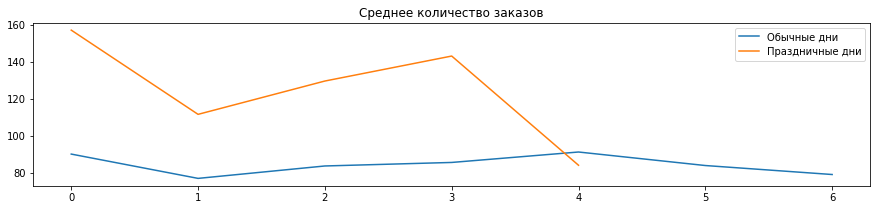

In [104]:
#Анализ повышения спроса в праздничные дни
taxi6 = taxi.pivot_table(index='dayofweek', columns='holiday', values='num_orders', aggfunc='mean').reset_index()
taxi6.columns = ['dayofweek', 'day', 'holiday']
fig, ax = plt.subplots()
day_line = taxi6['day'].plot(ax=ax, legend=True, label='Обычные дни')
holiday_line = taxi6['holiday'].plot(ax=ax, legend=True, label='Праздничные дни')
ax.set_title('Среднее количество заказов')
ax.legend()
fig.set_figwidth(15)
fig.set_figheight(3)
plt.show()

**Вывод:**

В праздничные дни наблюдается повышенный относительно обычного дня спрос

### Анализ корреляции

interval columns not set, guessing: ['num_orders', 'week', 'month', 'day', 'dayofweek', 'hour', 'lag', 'rolling_mean_24', 'rolling_mean_48', 'rolling_mean_72', 'rolling_mean_96', 'rolling_mean_120', 'rolling_mean_144', 'rolling_mean_168', 'trend', 'seasonal', 'holiday']


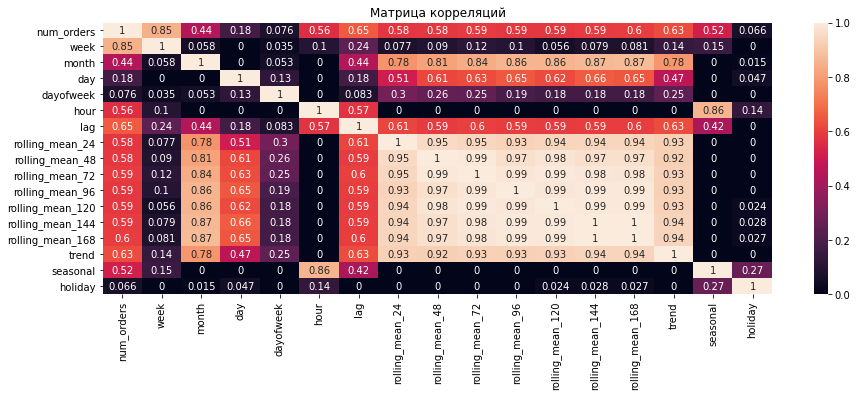

''

In [105]:
fig, ax = plt.subplots()
sns.heatmap(taxi.phik_matrix(), annot=True)
ax.set_title('Матрица корреляций')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show()
;

**Вывод:**

Необходимо удалить столбцы:
* month - так как у нас выгрузка только за полгода, и мы не до конца исследовали данный показатель. К тому же, показатель месяца можно по смыслу заменить на показатель номера недели. У показателя week более высокая корреляция с целевым признаком;
* week - в рамках полученной выгрузки виден тренд на увеличение спроса. В случае линейной модели показатель week может быть хорошим признаком - с увеличением week будет увеличиваться и целевой показатель. Но показатель week ненадежен, так как всегда будет увеличиваться в рамках одного года, а спрос в дальнейшем будет как расти, так и падать. Поэтому вместо week лучше использовать rolling_mean_168 - среднее за последние 7 дней;
* day - так как было выявлено цикличных колебаний спроса в рамках одного месяца;
* trend, seasonal - так как данные столбцы использовались для анализа, и для новых поступающих данных рассчитать trend и seasonal будет проблематично. trend можно заменить на rolling_mean_7, а seasonal - на hour, dayofweek и holiday;
* lag - так как это данные предыдущего часа. Показатель не слишком информативен - данные по спросу колеблятся в течение дня, но этот диапазон заранее известен, и не зависит от значения спроса в предыдущий час;
* rolling_mean_24-rolling_mean_144 - данные показатели использовались как альтернатива trend. Наибольшая корреляция c trend и num_orders наблюдается у показателя rolling_mean_168, что аналогично среднему спросу за последние 7 дней;
* holiday - не смотря на то, что в ходе анализа было показано увеличение спроса в праздничные дни, данный показатель своими редкими значениями может испортить модель. Было протестировано, что при разделении данных на обучающую, валидационную и тестовую выборки все праздничные дни попадают в обучающую, а в остальных отсутствуют. Из-за этого при обучении модель неправильно проставляет веса.

В свою очередь важными показателями являются:
* dayofweek, так как была выявлена зависимость спроса от дня недели;
* hour, так как была выявлена цикличность роста и падения спроса в течение дня;
* rolling_mean_168, так как этот показатель важен для прогнозирования общего тренда.

### Удаление  ненужных столбцов

In [106]:
taxi = taxi.drop(['trend', 'seasonal','week', 'month', 'day', 'lag', 'rolling_mean_24', 'rolling_mean_48',
                  'rolling_mean_72', 'rolling_mean_96', 'rolling_mean_120', 'rolling_mean_144', 'holiday'], axis=1)
display(taxi.head())

,num_orders,dayofweek,hour,rolling_mean_168
datetime,,,,
2018-03-01 01:00:00,85.0,3,1,124.000000
2018-03-01 02:00:00,71.0,3,2,104.500000
2018-03-01 03:00:00,66.0,3,3,93.333333
2018-03-01 04:00:00,43.0,3,4,86.500000
2018-03-01 05:00:00,6.0,3,5,77.800000


## Обучение

### Разделение данных на выборки

In [107]:
#Разделение на признаки и целевой признак
features = taxi.drop('num_orders', axis=1)
target = taxi['num_orders']

In [108]:
#Разделение данных на обучающую, валидационную и тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(features, target,  
    shuffle=False, test_size=0.1, random_state=12345)

display(features_train.describe())
display(features_test.describe())
display(target_train.describe())
display(target_test.describe())

,dayofweek,hour,rolling_mean_168
count,3973.000000,3973.000000,3973.000000
mean,3.025673,11.485276,77.013705
std,2.001723,6.919811,17.273781
min,0.000000,0.000000,50.666667
25%,1.000000,5.000000,60.184524
50%,3.000000,11.000000,73.678571
75%,5.000000,17.000000,90.172619
max,6.000000,23.000000,124.000000


,dayofweek,hour,rolling_mean_168
count,442.000000,442.000000,442.000000
mean,2.823529,11.658371,131.804460
std,1.883353,6.943473,9.615932
min,0.000000,0.000000,114.214286
25%,1.000000,6.000000,125.443452
50%,3.000000,12.000000,131.523810
75%,4.000000,18.000000,138.337798
max,6.000000,23.000000,154.434524


count    3973.000000
mean       78.279134
std        38.669877
min         0.000000
25%        52.000000
50%        75.000000
75%       101.000000
max       437.000000
Name: num_orders, dtype: float64

count    442.000000
mean     139.556561
std       58.615955
min       13.000000
25%      104.000000
50%      135.000000
75%      173.000000
max      462.000000
Name: num_orders, dtype: float64

**Вывод:**

Распределение дней и часов в выборках примерно одинаково (т.к. временной ряд не содержал пропусков). В валидационную и тестовую выборку не попали праздничные дни, но их немного, поэтому данный факт не должен оказать существенного влияния. Скользящее среднее в валидационной выборке больше, чем в обучающей, а в тестовой - больше, чем в валидационной, что связано с общим трендом к увеличению спроса, и тем, что при разделении на выборки значения ряда не перемешивались.

### OHE

Показатели дня недели являются качественными, а не количественными, не смотря на то, что указаны в формате int. Поэтому применим для них OHE. Нормализацию для оставшегося признака скользящего среднего проводить не будем, т.к. этот показатель растет в каждой следующей выборке (т.е. нельзя нормировать скользящее среднее в тестовой выборке по scaler, обученному на обучающей)

In [109]:
features_train_ohe = features_train.copy()
features_test_ohe = features_test.copy()

In [110]:
#OHE
pd.options.mode.chained_assignment = None
quality_features = ['dayofweek', 'hour']

encoder = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
encoder.fit(features_train_ohe[quality_features])
features_train_ohe[encoder.get_feature_names()] = (encoder.transform(features_train_ohe[quality_features]))
features_train_ohe = features_train_ohe.drop(quality_features, axis=1)
features_train_ohe.columns = ['rolling_mean_168', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
                              'dayofweek_5', 'dayofweek_6', 'hour_1', 'hour_2','hour_3', 'hour_4', 'hour_5',
                              'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
                              'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 
                              'hour_21', 'hour_22', 'hour_23']
display(features_train_ohe.head())

features_test_ohe[encoder.get_feature_names()] = (encoder.transform(features_test_ohe[quality_features]))
features_test_ohe = features_test_ohe.drop(quality_features, axis=1)
features_test_ohe.columns = features_train_ohe.columns
display(features_test_ohe.head())

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,rolling_mean_168,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 01:00:00,124.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 02:00:00,104.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 03:00:00,93.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 04:00:00,86.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01 05:00:00,77.800000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,rolling_mean_168,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-13 14:00:00,114.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-13 15:00:00,114.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-13 16:00:00,114.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-13 17:00:00,114.226190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-13 18:00:00,114.339286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Подготовка к кросс-валидации

In [113]:
#Функция RMSE
def rmse(target, pred):
    return (mean_squared_error(target, pred))**0.5

my_scorer = make_scorer(rmse, greater_is_better=False)

### Линейная модель

In [114]:
%time
print('Модель линейной регрессии:')
lin_model = LinearRegression()
time_split = TimeSeriesSplit(n_splits=5)

grid_space={'fit_intercept':[True]}
grid = GridSearchCV(lin_model, param_grid=grid_space, cv=time_split, scoring=my_scorer)
grid_lin_model = grid.fit(features_train_ohe, target_train)
best_lin_model = grid_lin_model.best_estimator_
print('RMSE модели:', grid_lin_model.best_score_*(-1))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Модель линейной регрессии:
RMSE модели: 25.889403780751195


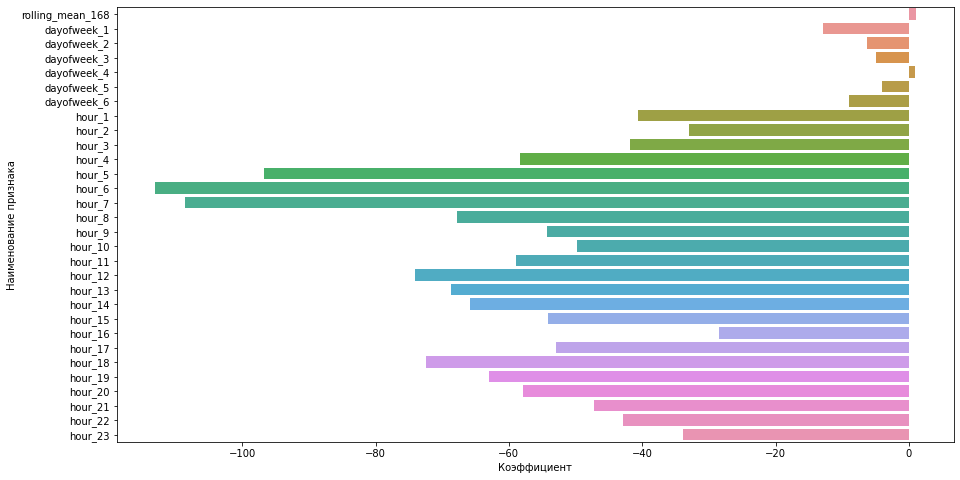

In [115]:
#График важности факторов
coef_values = pd.DataFrame(data=best_lin_model.coef_, columns=['coef'])
columns = pd.DataFrame(data=features_train_ohe.columns, columns=['columns'])
coef_table = columns.join(coef_values)
coef_table.plot

fig, ax = plt.subplots(figsize=(15, 8))    
diagram = sns.barplot(data=coef_table, y='columns', x='coef', orient = 'h')
ax.set_ylabel('Наименование признака')
diagram.set_xlabel('Коэффициент');

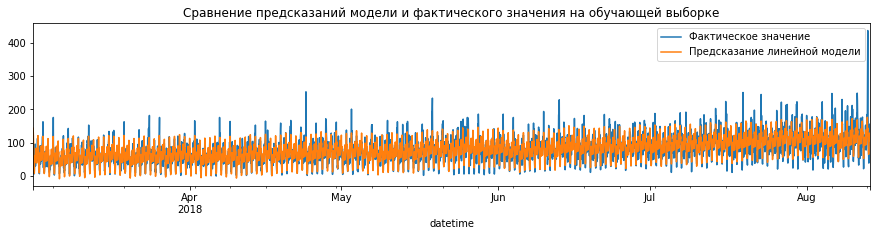

In [116]:
#График, сравнивающий предсказание модели и факт
fig, ax = plt.subplots()
fact_line = target_train.plot(ax=ax, legend=True, label='Фактическое значение')
lin_pred_line = (pd.Series(best_lin_model.predict(features_train_ohe), index=target_train.index)
                 .plot(ax=ax, legend=True, label='Предсказание линейной модели'))
ax.set_title('Сравнение предсказаний модели и фактического значения на обучающей выборке')
ax.legend()
fig.set_figwidth(15)
fig.set_figheight(3)
plt.show()

### Случайный лес

In [117]:
%%time
print('Модель случайного леса:')

forest_model = RandomForestRegressor()
time_split = TimeSeriesSplit(n_splits=5)
grid_space={'n_estimators': range(20, 201, 20),
            'max_depth': range(5, 16, 5),
            'random_state': [12345]}
grid = GridSearchCV(forest_model, param_grid=grid_space, cv=time_split, scoring=my_scorer)
grid_forest_model = grid.fit(features_train, target_train)
best_forest_model = grid_forest_model.best_estimator_
print('RMSE модели:', grid_forest_model.best_score_*(-1))
print('Лучшие гиперпараметры:', grid_forest_model.best_params_)

Модель случайного леса:
RMSE модели: 25.753097766976623
Лучшие гиперпараметры: {'max_depth': 10, 'n_estimators': 60, 'random_state': 12345}
CPU times: user 43.4 s, sys: 405 ms, total: 43.8 s
Wall time: 43.8 s


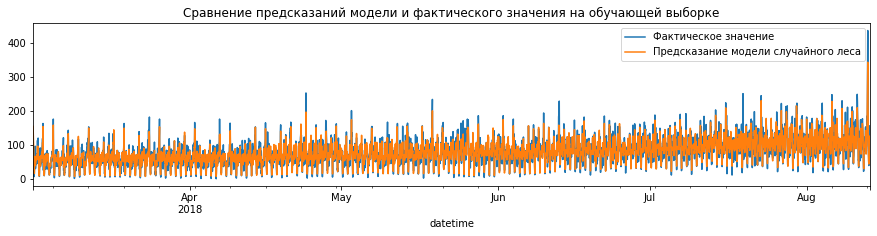

In [118]:
#График, сравнивающий предсказание модели и факт
fig, ax = plt.subplots()
fact_line = target_train.plot(ax=ax, legend=True, label='Фактическое значение')
forest_pred_line = (pd.Series(best_forest_model.predict(features_train), index=target_train.index)
                    .plot(ax=ax, legend=True, label='Предсказание модели случайного леса'))
ax.set_title('Сравнение предсказаний модели и фактического значения на обучающей выборке')
ax.legend()
fig.set_figwidth(15)
fig.set_figheight(3)
plt.show()

In [119]:
%%time
print('Модель случайного леса с OHE:')

forest_model_ohe = RandomForestRegressor()
time_split = TimeSeriesSplit(n_splits=5)
grid_space={'n_estimators': range(20, 201, 20),
            'max_depth': range(5, 16, 5),
            'random_state': [12345]}
grid = GridSearchCV(forest_model_ohe, param_grid=grid_space, cv=time_split, scoring=my_scorer)
grid_forest_model_ohe = grid.fit(features_train_ohe, target_train)
best_forest_model_ohe = grid_forest_model_ohe.best_estimator_
print('RMSE модели:', grid_forest_model_ohe.best_score_*(-1))
print('Лучшие гиперпараметры:', grid_forest_model_ohe.best_params_)

Модель случайного леса с OHE:
RMSE модели: 28.53013869253487
Лучшие гиперпараметры: {'max_depth': 15, 'n_estimators': 60, 'random_state': 12345}
CPU times: user 55 s, sys: 498 ms, total: 55.5 s
Wall time: 56.5 s


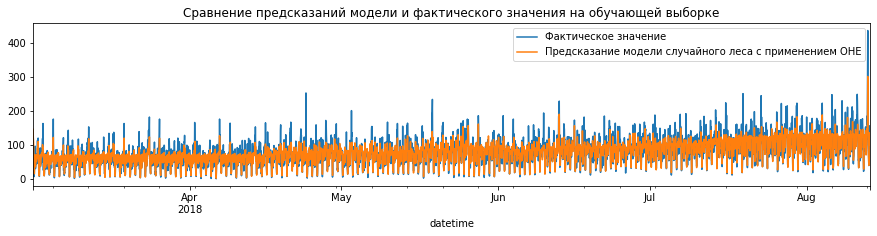

In [120]:
#График, сравнивающий предсказание модели и факт
fig, ax = plt.subplots()
fact_line = target_train.plot(ax=ax, legend=True, label='Фактическое значение')
forest_ohe_pred_line = (pd.Series(best_forest_model_ohe.predict(features_train_ohe), index=target_train.index)
                        .plot(ax=ax, legend=True, label='Предсказание модели случайного леса с применением ОНЕ'))
ax.set_title('Сравнение предсказаний модели и фактического значения на обучающей выборке')
ax.legend()
fig.set_figwidth(15)
fig.set_figheight(3)
plt.show()

### LightGBM

In [121]:
#Подготовка данных для LightGBM
features_train_lgbm = features_train.copy()
target_train_lgbm = target_train.copy()
features_test_lgbm = features_test.copy()

features_train_lgbm['dayofweek'] = features_train_lgbm['dayofweek'].astype('category')
features_train_lgbm['hour'] = features_train_lgbm['hour'].astype('category')
features_test_lgbm['dayofweek'] = features_test_lgbm['dayofweek'].astype('category')
features_test_lgbm['hour'] = features_test_lgbm['hour'].astype('category')

In [122]:
%%time
print('Модель LightGBM:')

lightgbm_model = LGBMRegressor()
time_split = TimeSeriesSplit(n_splits=5)
grid_space={'n_estimators': (50, 101, 50),
            'max_depth': range(5, 11, 5),
            #'eval_metric': ['rmse'],
            'random_state': [12345]}
grid = GridSearchCV(lightgbm_model, param_grid=grid_space, cv=time_split, scoring=my_scorer)
grid_lightgbm_model = grid.fit(features_train_lgbm, target_train_lgbm, eval_metric='rmse')
best_lightgbm_model = grid_lightgbm_model.best_estimator_
print('RMSE модели:', grid_lightgbm_model.best_score_*(-1))
print('Лучшие гиперпараметры:', grid_lightgbm_model.best_params_)

Модель LightGBM:
RMSE модели: 26.159320003947663
Лучшие гиперпараметры: {'max_depth': 10, 'n_estimators': 50, 'random_state': 12345}
CPU times: user 11.7 s, sys: 0 ns, total: 11.7 s
Wall time: 11.8 s


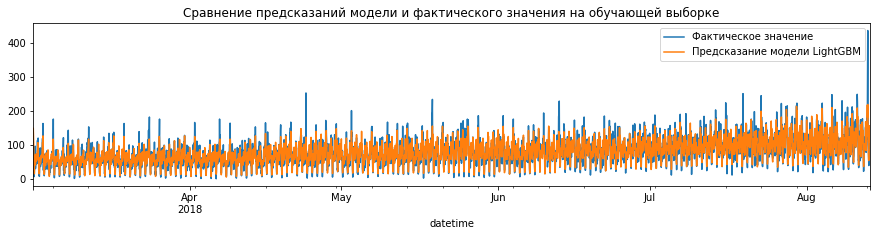

In [123]:
#График, сравнивающий предсказание модели и факт
fig, ax = plt.subplots()
fact_line = target_train_lgbm.plot(ax=ax, legend=True, label='Фактическое значение')
lightgbm_pred_line = (pd.Series(best_lightgbm_model.predict(features_train_lgbm), index=target_train_lgbm.index)
                      .plot(ax=ax, legend=True, label='Предсказание модели LightGBM'))
ax.set_title('Сравнение предсказаний модели и фактического значения на обучающей выборке')
ax.legend()
fig.set_figwidth(15)
fig.set_figheight(3)
plt.show()

### CatBoost

In [124]:
%%time
print('Модель CatBoost:')

cat_features = ['dayofweek', 'hour']
catboost_model = CatBoostRegressor()
time_split = TimeSeriesSplit(n_splits=5)
grid_space={'iterations': range(150, 301, 150),
            'max_depth': range(5, 16, 5),
            'loss_function': ['RMSE'], 
            'verbose': [300], 
            'cat_features': [cat_features],
            'random_state': [12345]}
grid = GridSearchCV(catboost_model, param_grid=grid_space, cv=time_split, scoring=my_scorer)
grid_catboost_model = grid.fit(features_train, target_train)
best_catboost_model = grid_catboost_model.best_estimator_
print('RMSE модели:', grid_catboost_model.best_score_*(-1))
print('Лучшие гиперпараметры:', grid_catboost_model.best_params_)

Модель CatBoost:
Learning rate set to 0.179398
0:	learn: 27.4201016	total: 1.05ms	remaining: 156ms
149:	learn: 16.8363820	total: 71ms	remaining: 0us
Learning rate set to 0.200137
0:	learn: 27.8374547	total: 961us	remaining: 143ms
149:	learn: 18.0295576	total: 90.8ms	remaining: 0us
Learning rate set to 0.21337
0:	learn: 29.3197491	total: 1.17ms	remaining: 174ms
149:	learn: 19.4308137	total: 106ms	remaining: 0us
Learning rate set to 0.223287
0:	learn: 30.3793353	total: 1.3ms	remaining: 195ms
149:	learn: 20.7513124	total: 128ms	remaining: 0us
Learning rate set to 0.231297
0:	learn: 31.2851745	total: 1.68ms	remaining: 250ms
149:	learn: 21.1102812	total: 149ms	remaining: 0us
Learning rate set to 0.179398
0:	learn: 27.4236239	total: 6.85ms	remaining: 1.02s
149:	learn: 11.4695941	total: 506ms	remaining: 0us
Learning rate set to 0.200137
0:	learn: 27.7828355	total: 3.22ms	remaining: 480ms
149:	learn: 13.6456647	total: 564ms	remaining: 0us
Learning rate set to 0.21337
0:	learn: 29.2212264	total

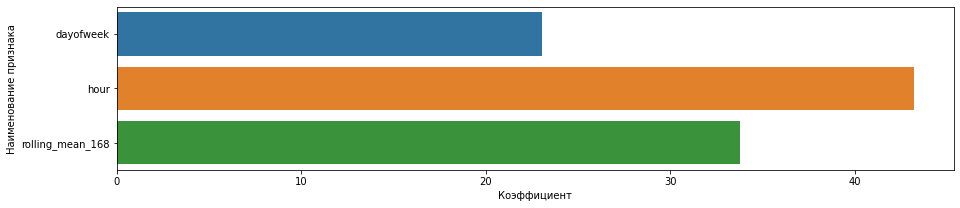

In [125]:
#График важности факторов
coef_values = pd.DataFrame(data=best_catboost_model.get_feature_importance(), columns=['coef'])
columns = pd.DataFrame(data=features_train.columns, columns=['columns'])
coef_table = columns.join(coef_values)
coef_table.plot

fig, ax = plt.subplots(figsize=(15, 3))    
diagram = sns.barplot(data=coef_table, y='columns', x='coef', orient = 'h')
ax.set_ylabel('Наименование признака')
diagram.set_xlabel('Коэффициент');

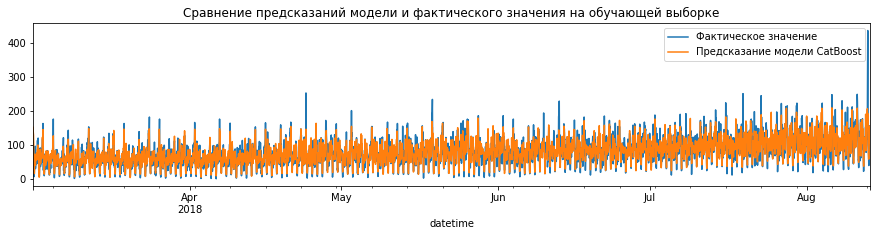

In [126]:
#График, сравнивающий предсказание модели и факт
fig, ax = plt.subplots()
fact_line = target_train.plot(ax=ax, legend=True, label='Фактическое значение')
catboost_pred_line = (pd.Series(best_catboost_model.predict(features_train), index=target_train.index)
                      .plot(ax=ax, legend=True, label='Предсказание модели CatBoost'))
ax.set_title('Сравнение предсказаний модели и фактического значения на обучающей выборке')
ax.legend()
fig.set_figwidth(15)
fig.set_figheight(3)
plt.show()

**Вывод:**

После подбора лучших гиперпараметров были получены следующие значения RMSE для моделей:
* Линейная модель: 25.89;
* Модель случайного леса без OHE: 25.75. Количество деревьев в лучшей модели: 60, Глубина деревьев в лучшей модели: 10;
* Модель случайного леса с OHE: 28.53. Количество деревьев в лучшей модели: 60, Глубина деревьев в лучшей модели: 15;
* Модель LightGBM: 26.16. Количество деревьев в лучшей модели: 50, Глубина деревьев в лучшей модели: 10;
* Модель CatBoost: 26.92. Количество итераций в лучшей модели: 300, Глубина деревьев в лучшей модели: 15.

Все протестированные модели показали неплохое качество, но лучшее RMSE наблюдается у модели случайного леса и линейной модели. Из них двух выбираем линейную модель, т.к. в данных есть тренд к дальнейшему увеличению спроса, а модель случайного леса может плохо его предсказывать, т.к. "не учила" будущие признаки, которые могут превосходить текущие диапазоны.

## Тестирование

In [127]:
#Тестирование лучшей модели
pred_test = best_lin_model.predict(features_test_ohe)
rmse_test = rmse(target_test, pred_test)
print('RMSE модели после тестирования:', rmse_test)

RMSE модели после тестирования: 43.138147268030835


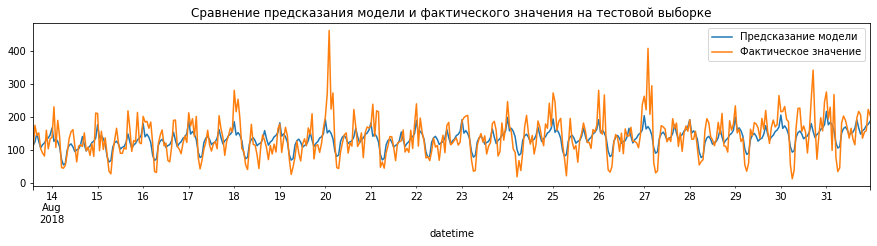

In [128]:
#График
fig, ax = plt.subplots()
pred_line = pd.Series(pred_test, index=target_test.index).plot(ax=ax, legend=True, label='Предсказание модели')
fact_line = target_test.plot(ax=ax, legend=True, label='Фактическое значение')
ax.set_title('Сравнение предсказания модели и фактического значения на тестовой выборке')
ax.legend()
fig.set_figwidth(15)
fig.set_figheight(3)
plt.show()

## Вывод

**1. Загрузка и подготовка данных**

Загружен датасет с количеством строк, равным 26 496. В датасете содержатся данные о количестве заказов в разрезе каждых 10 минут в период с 01.03.2018 по 31.08.2018 (полгода). Датасет не содержит пропусков и дубликатов, но содержит выбросы. На этапе обработки данных проведен ресемплинг, данные объединены по каждому часу. Удалены 0,5% выбросов сверху. Добавлены новые столбцы - в их числе день недели, час, скользящее среднее спроса за последние 7 дней.


**2. Результат проведения анализа**

Выявлен тренд к увеличению заказов такси, но данных недостаточно, чтобы говорить о дальнейшем продолжении тренда после исследуемого периода (в датасете данные всего за полгода). За отражение общего тренда в модели будет отвечать показатель скользящего среднего за 7 дней.

Выявлены систематические колебания спроса в течение дня: 
* с 3:00 до 7:00 низкий спрос;
* С 08:00 до 10:00 повышенный спрос;
* С 11:00 до 13:00 спрос ненамного падает;
* С 14:00 до 17:00 спрос немного повышается;
* С 18:00-21:00 немного падает;
* С 22:00 до 03:00 пиковый спрос.

Также выявлены систематические колебания спроса в течение дней недели:
* Наименьший спрос наблюдается во вторник и воскресенье;
* Наибольший спрос наблюдается в понедельник и пятницу.

Также выявлено повышение спроса в праздничные дни.


**3. Результат обучения моделей**

Были получены следующие значения RMSE для моделей:
* Линейная модель: 25.89;
* Модель случайного леса: 25.75;
* Модель LightGBM: 26.16;
* Модель CatBoost: 26.92.

Все протестированные модели показали неплохое качество, но лучшее RMSE наблюдается у модели случайного леса и линейной модели. Из них двух выбираем линейную модель, т.к. в данных есть тренд к дальнейшему увеличению спроса, а модель случайного леса может плохо его предсказывать, т.к. "не учила" будущие признаки, которые могут превосходить текущие диапазоны.

**4. Результат тестирования**

По результатам тестирования линейной модели на тестовой выборке было получено RMSE=43.14